In [72]:
#Experimento de Kissas 2 Enero

In [1]:
# What version python do you have 
import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

check_gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE" )




GPU is available


In [73]:
#Cargar modelos
#model_1 = tf.keras.models.load_model("red_vaso_130Dic_5.h5")
#model_2 = tf.keras.models.load_model("red_vaso_230Dic_5.h5")
#model_2 = tf.keras.models.load_model("red_vaso_330Dic_5.h5")

In [2]:
#tipos de datos 
DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE)   #establece el tipo de float predeterminado

#Número de Puntos
N_r = 2000

In [3]:

input_vessel_1 = np.load("input_1.npy", allow_pickle=True).item()
output_vessel_2 = np.load("output_2.npy", allow_pickle=True).item()
output_vessel_3 = np.load("output_3.npy", allow_pickle=True).item()

    
velocity_measurements_vessel1 = input_vessel_1["Velocity"][:,None]
velocity_measurements_vessel2 = output_vessel_2["Velocity"][:,None]
velocity_measurements_vessel3 = output_vessel_3["Velocity"][:,None]

    
area_measurements_vessel1 = input_vessel_1["Area"][:,None]
area_measurements_vessel2 = output_vessel_2["Area"][:,None]
area_measurements_vessel3 = output_vessel_3["Area"][:,None]

t_med = input_vessel_1["Time"][:,None]
t_min_mesurement = t_med.min()

N_u = len(t_med)    #cambiar t por t med

#Medicions del area y de la velocidad a la entrada del vaso
u_in = tf.constant(velocity_measurements_vessel1 , dtype = DTYPE)
A_in = tf.constant(area_measurements_vessel1 , dtype = DTYPE)

#Medicions del area y de la velocidad a la entrada del vaso
u_out = tf.constant(velocity_measurements_vessel2 , dtype = DTYPE)
A_out = tf.constant(area_measurements_vessel2 , dtype = DTYPE)

#Medicions del area y de la velocidad a la entrada del vaso
u_out3 = tf.constant(velocity_measurements_vessel3 , dtype = DTYPE)
A_out3 = tf.constant(area_measurements_vessel3 , dtype = DTYPE)




Metal device set to: Apple M1


2022-12-30 22:42:35.723329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-30 22:42:35.723607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
#Dominio 1
tmin = 0 
tmax = 3.3
xmin_1 = 0
xmax_1 = 0.1703


#Cotas Inferiores
lb1 = tf.constant([tmin, xmin_1], dtype = DTYPE)

#Cotas Superiores
ub1 = tf.constant([tmax, xmax_1], dtype = DTYPE)

#Dibujo de un muestreo uniforme de los puntos de colocación
#x_r2 = tf.random.uniform((N_r,1), lb2[1], ub2[1], dtype = DTYPE)
#t_r2 = tf.random.uniform((N_r,1), lb2[0], ub2[0], dtype = DTYPE)
x_r1 = tf.constant(lb1[1]+ (ub1[1] - lb1[1])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
t_r = tf.constant(lb1[0]+ (ub1[0] - lb1[0])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
X_r1 = tf.concat([x_r1, t_r], axis = 1) #Muestreo aleatorio simple en el cuadrado [0.1703, 0.1773] x [0,3.3]


#Condición de Borde 
x_in =tf.ones((N_u,1), dtype = DTYPE)*xmin_1
t_0 = tf.constant(t_med , dtype = DTYPE)
X_in = tf.concat([x_in, t_0], axis = 1)


#Condición Inicial 
X_vessel1 = np.linspace(xmin_1, xmax_1, N_u)[:,None]
X_initial_vessel1 = tf.constant(X_vessel1 , dtype = DTYPE)
t_inicial =tf.ones((N_u,1), dtype = DTYPE)*t_min_mesurement
X_01 = tf.concat([X_initial_vessel1, t_inicial], axis = 1) 

In [5]:
#Dominio 2
tmin = 0 
tmax = 3.3
xmin_2 = 0.1703
xmax_2 = 0.1773


#Cotas Inferiores
lb2 = tf.constant([tmin, xmin_2], dtype = DTYPE)

#Cotas Superiores
ub2 = tf.constant([tmax, xmax_2], dtype = DTYPE)

#Dibujo de un muestreo uniforme de los puntos de colocación
#x_r2 = tf.random.uniform((N_r,1), lb2[1], ub2[1], dtype = DTYPE)
#t_r2 = tf.random.uniform((N_r,1), lb2[0], ub2[0], dtype = DTYPE)
x_r2 = tf.constant(lb2[1]+ (ub2[1] - lb2[1])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
#t_r2 = tf.constant(lb2[0]+ (ub2[0] - lb2[0])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
X_r2 = tf.concat([x_r2, t_r], axis = 1) #Muestreo aleatorio simple en el cuadrado [0.1703, 0.1773] x [0,3.3]


#Condición de Borde 
x_out2 =tf.ones((N_u,1), dtype = DTYPE)*xmax_2
t_0 = tf.constant(t_med , dtype = DTYPE)
X_out_2 = tf.concat([x_out2, t_0], axis = 1)


#Condición Inicial 
X_vessel2 = np.linspace(xmin_2, xmax_2, N_u)[:,None]
X_initial_vessel2 = tf.constant(X_vessel2 , dtype = DTYPE)
t_inicial =tf.ones((N_u,1), dtype = DTYPE)*t_min_mesurement
X_02 = tf.concat([X_initial_vessel2, t_inicial], axis = 1) 

In [6]:
#Dominio 3
tmin = 0 
tmax = 3.3
xmin_3 = 0.1703
xmax_3 = 0.1770


#Cotas Inferiores
lb3 = tf.constant([tmin, xmin_3], dtype = DTYPE)

#Cotas Superiores
ub3 = tf.constant([tmax, xmax_3], dtype = DTYPE)

#Dibujo de un muestreo uniforme de los puntos de colocación
#x_r2 = tf.random.uniform((N_r,1), lb2[1], ub2[1], dtype = DTYPE)
#t_r2 = tf.random.uniform((N_r,1), lb2[0], ub2[0], dtype = DTYPE)
x_r3 = tf.constant(lb3[1]+ (ub3[1] - lb3[1])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
#t_r3 = tf.constant(lb3[0]+ (ub3[0] - lb3[0])*np.random.random(2000), shape = (2000,1), dtype = DTYPE)
X_r3 = tf.concat([x_r3, t_r], axis = 1) #Muestreo aleatorio simple en el cuadrado [0.1703, 0.1773] x [0,3.3]


#Condición de Borde 
x_out3 =tf.ones((N_u,1), dtype = DTYPE)*xmax_3
t_0 = tf.constant(t_med , dtype = DTYPE)
X_out_3 = tf.concat([x_out3, t_0], axis = 1)


#Condición Inicial 
X_vessel3 = np.linspace(xmin_3, xmax_3, N_u)[:,None]
X_initial_vessel3 = tf.constant(X_vessel3 , dtype = DTYPE)
t_inicial =tf.ones((N_u,1), dtype = DTYPE)*t_min_mesurement
X_03 = tf.concat([X_initial_vessel3, t_inicial], axis = 1) 

In [7]:
#Configuración Red Neuronal
def init_model(num_hidden_layers = 7, num_neurons_per_layer = 100 ):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(2))
    
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer, 
                                        activation = tf.keras.activations.get('tanh'),
                                       kernel_initializer = 'glorot_normal'))
    model.add(tf.keras.layers.Dense(3))
    
    return model

In [8]:
#Condiciones iniciales

p_ext = 0 
beta1 =  69673881.97
A_01 = 1.35676200E-05 
rho = 1000

beta2 =   541788704.42
A_02 = 1.81458400E-06

beta3 =  69549997.97
A_03 = 1.35676200E-05





In [9]:
#Adimensionalizar
U_a = 10.0E+0
L = np.sqrt(0.3*(1.35676200E-05 + 1.81458400E-06 + 1.35676200E-05))
T_a = L/U_a
p0 = rho*U_a**2
A0 = L**2

#Adimensionar y normalizar las entradas
X_r1_a = tf.concat([x_r1/L, t_r/T_a], axis = 1)
X_01_a = tf.concat([X_initial_vessel1/L, t_inicial/T_a], axis = 1) 
X_in_a = tf.concat([x_in/L, t_0/T_a], axis = 1) 

#Normalización
Xmean1, Xstd1 = tf.reduce_mean(X_r1_a[:, 0:1]), tf.math.reduce_std(X_r1_a[:,0:1])
Tmean1, Tstd1 = tf.reduce_mean(X_r1_a[:, 1:2]), tf.math.reduce_std(X_r1_a[:,1:2])
jac_x1 = 1/Xstd1
jac_t = 1/Tstd1 

X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1) 
X_01_an = tf.concat([(X_01_a[:, 0:1] - Xmean1)*jac_x1 , (X_01_a[:,1:2] - Tmean1)*jac_t], axis = 1) 
X_in_an = tf.concat([(X_in_a[:, 0:1] - Xmean1)*jac_x1 , (X_in_a[:,1:2] - Tmean1)*jac_t], axis = 1)





#Adimensionalizar
#U_a = 10.0E+0
#L = np.sqrt(1.81458400E-06) 
#T_a = L/U_a
#p0 = rho*U_a**2
#A0 = L**2

#Adimensionar y normalizar las entradas
X_r2_a = tf.concat([x_r2/L, t_r/T_a], axis = 1)
X_02_a = tf.concat([X_initial_vessel2/L, t_inicial/T_a], axis = 1) 
X_out_a = tf.concat([x_out2/L, t_0/T_a], axis = 1) 

#Normalización
Xmean2, Xstd2 = tf.reduce_mean(X_r2_a[:, 0:1]), tf.math.reduce_std(X_r2_a[:,0:1])
Tmean2, Tstd2 = tf.reduce_mean(X_r2_a[:, 1:2]), tf.math.reduce_std(X_r2_a[:,1:2])
jac_x2 = 1/Xstd2
jac_t = 1/Tstd2 

X_r2_an = tf.concat([(X_r2_a[:, 0:1] - Xmean2)*jac_x2 , (X_r2_a[:,1:2] - Tmean2)*jac_t], axis = 1) 
X_02_an = tf.concat([(X_02_a[:, 0:1] - Xmean2)*jac_x2 , (X_02_a[:,1:2] - Tmean2)*jac_t], axis = 1) 
X_out_an = tf.concat([(X_out_a[:, 0:1] - Xmean2)*jac_x2 , (X_out_a[:,1:2] - Tmean2)*jac_t], axis = 1)





#Adimensionalizar
#U_a = 10.0E+0
#L = np.sqrt(1.35676200E-05) 
#T_a = L/U_a
#p0 = rho*U_a**2
#A0 = L**2

#Adimensionar y normalizar las entradas
X_r3_a = tf.concat([x_r3/L, t_r/T_a], axis = 1)
X_03_a = tf.concat([X_initial_vessel3/L, t_inicial/T_a], axis = 1) 
X_out3_a = tf.concat([x_out3/L, t_0/T_a], axis = 1) 

#Normalización
Xmean3, Xstd3 = tf.reduce_mean(X_r3_a[:, 0:1]), tf.math.reduce_std(X_r3_a[:,0:1])
Tmean3, Tstd3 = tf.reduce_mean(X_r3_a[:, 1:2]), tf.math.reduce_std(X_r3_a[:,1:2])
jac_x3 = 1/Xstd3
jac_t = 1/Tstd3 

X_r3_an = tf.concat([(X_r3_a[:, 0:1] - Xmean3)*jac_x3 , (X_r3_a[:,1:2] - Tmean3)*jac_t], axis = 1) 
X_03_an = tf.concat([(X_03_a[:, 0:1] - Xmean3)*jac_x3 , (X_03_a[:,1:2] - Tmean3)*jac_t], axis = 1) 
X_out3_an = tf.concat([(X_out3_a[:, 0:1] - Xmean3)*jac_x3 , (X_out3_a[:,1:2] - Tmean3)*jac_t], axis = 1)



In [10]:
#Definición funcion residual PDE
def fun_r1A(u, u_x, A, A_t, A_x):
    return A_t + u*A_x + A*u_x    

def fun_r1u(u, u_t, u_x, p_x):
    return u_t + u*u_x  +  p_x   

def fun_r1p( p, A):
    return p - (1/p0)*(p_ext +  beta1*(tf.sqrt(A*A0) -  tf.sqrt(A_01))) 



#Definición funcion residual PDE
def fun_r2A(u, u_x, A, A_t, A_x):
    return A_t + u*A_x + A*u_x    

def fun_r2u(u, u_t, u_x, p_x):
    return u_t + u*u_x  +  p_x   

def fun_r2p( p, A):
    return p - (1/p0)*(p_ext +  beta2*(tf.sqrt(A*A0) -  tf.sqrt(A_02))) 



#Definición funcion residual PDE
def fun_r3A(u, u_x, A, A_t, A_x):
    return A_t + u*A_x + A*u_x    

def fun_r3u(u, u_t, u_x, p_x):
    return u_t + u*u_x  +  p_x   

def fun_r3p( p, A):
    return p - (1/p0)*(p_ext +  beta3*(tf.sqrt(A*A0) -  tf.sqrt(A_03))) 



In [11]:
def get_r1(model, X_r):
    x, t = X_r[:, 0:1], X_r[:,1:2]    
    with tf.GradientTape(persistent = True) as tape:        
        tape.watch(x)
        tape.watch(t)
    
        A = tf.exp(model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,0:1])  #concat tambien funciona
        u = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,1:2] 
        p = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,2:3] #A hat, u hat, p hat

    A_t = tape.gradient(A,t)*jac_t
    A_x = tape.gradient(A,x)*jac_x1    
    u_t = tape.gradient(u,t)*jac_t
    u_x = tape.gradient(u,x)*jac_x1
    p_x = tape.gradient(p,x)*jac_x1
    
    #del tape
    
    return fun_r1A( u, u_x, A, A_t, A_x), fun_r1u( u, u_t, u_x, p_x), fun_r1p( p, A)

In [12]:
def get_r2(model, X_r):
    x, t = X_r[:, 0:1], X_r[:,1:2]    
    with tf.GradientTape(persistent = True) as tape:        
        tape.watch(x)
        tape.watch(t)
    
        A = tf.exp(model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,0:1])  #concat tambien funciona
        u = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,1:2] 
        p = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,2:3] #A hat, u hat, p hat

    A_t = tape.gradient(A,t)*jac_t
    A_x = tape.gradient(A,x)*jac_x2    
    u_t = tape.gradient(u,t)*jac_t
    u_x = tape.gradient(u,x)*jac_x2
    p_x = tape.gradient(p,x)*jac_x2
    
    #del tape
    
    return fun_r2A( u, u_x, A, A_t, A_x), fun_r2u( u, u_t, u_x, p_x), fun_r2p( p, A)

In [13]:
def get_r3(model, X_r):
    x, t = X_r[:, 0:1], X_r[:,1:2]    
    with tf.GradientTape(persistent = True) as tape:        
        tape.watch(x)
        tape.watch(t)
    
        A = tf.exp(model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,0:1])  #concat tambien funciona
        u = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,1:2] 
        p = model(tf.stack([x[:,0],t[:,0]], axis = 1))[:,2:3] #A hat, u hat, p hat

    A_t = tape.gradient(A,t)*jac_t
    A_x = tape.gradient(A,x)*jac_x3    
    u_t = tape.gradient(u,t)*jac_t
    u_x = tape.gradient(u,x)*jac_x3
    p_x = tape.gradient(p,x)*jac_x3
    
    #del tape
    
    return fun_r3A( u, u_x, A, A_t, A_x), fun_r3u( u, u_t, u_x, p_x), fun_r3p( p, A)
    

In [14]:
#Calculo del a funcion loss de nuestro modelo

def compute_loss_1(model, X_r, X_0, X_in):
    r_A, r_u, r_p = get_r1(model, X_r)
    
    phi_r_A = tf.reduce_mean(tf.square(r_A))
    phi_r_u = tf.reduce_mean(tf.square(r_u))
    phi_r_p = tf.reduce_mean(tf.square(r_p))
    

    loss = phi_r_A + phi_r_u + phi_r_p  #inicializar loss
    
    #agregando componente borde e inicial
    xx0, tt0 = X_0[:, 0:1], X_0[:,1:2]
    A_pred = tf.exp(model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,0:1])
    u_pred = model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_01/A0) - A_pred))
    loss += tf.reduce_mean(tf.square((0/U_a) - u_pred))
    
    
    #Salida del vaso
    xxout, ttout = X_in[:, 0:1], X_in[:,1:2]
    A_pred_in = tf.exp(model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,0:1])
    u_pred_in = model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_in/A0) - A_pred_in))
    loss += tf.reduce_mean(tf.square((u_in/U_a) - u_pred_in))   
    
    return loss

In [15]:
def compute_loss_2(model, X_r, X_0, X_out):
    r_A, r_u, r_p = get_r2(model, X_r)
    
    phi_r_A = tf.reduce_mean(tf.square(r_A))
    phi_r_u = tf.reduce_mean(tf.square(r_u))
    phi_r_p = tf.reduce_mean(tf.square(r_p))
    

    loss = (phi_r_A + phi_r_u + phi_r_p)  #inicializar loss
    
    #agregando componente borde e inicial
    xx0, tt0 = X_0[:, 0:1], X_0[:,1:2]
    A_pred =tf.exp(model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,0:1])
    u_pred = model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_02/A0) - A_pred))
    loss += tf.reduce_mean(tf.square((0/U_a) - u_pred))
    
    
    #Salida del vaso
    xxout, ttout = X_out[:, 0:1], X_out[:,1:2]
    A_pred_out = tf.exp(model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,0:1])
    u_pred_out = model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_out/A0) - A_pred_out))
    loss += tf.reduce_mean(tf.square((u_out/U_a) - u_pred_out))   
    
    return loss

In [16]:
def compute_loss_3(model, X_r, X_0, X_out):
    r_A, r_u, r_p = get_r3(model, X_r)
    
    phi_r_A = tf.reduce_mean(tf.square(r_A))
    phi_r_u = tf.reduce_mean(tf.square(r_u))
    phi_r_p = tf.reduce_mean(tf.square(r_p))
    

    loss = (phi_r_A + phi_r_u + phi_r_p)  #inicializar loss
    
    #agregando componente borde e inicial
    xx0, tt0 = X_0[:, 0:1], X_0[:,1:2]
    A_pred =tf.exp(model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,0:1])
    u_pred = model(tf.stack([xx0[:,0], tt0[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_03/A0) - A_pred))
    loss += tf.reduce_mean(tf.square((0/U_a) - u_pred))
    
    
    #Salida del vaso
    xxout, ttout = X_out[:, 0:1], X_out[:,1:2]
    A_pred_out3 = tf.exp(model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,0:1])
    u_pred_out3 = model(tf.stack([xxout[:,0], ttout[:,0]], axis = 1))[:,1:2]
    
    loss += tf.reduce_mean(tf.square((A_out3/A0) - A_pred_out3))
    loss += tf.reduce_mean(tf.square((u_out3/U_a) - u_pred_out3))   
    
    return loss

In [17]:
#t_0

In [18]:
#Bifurcacion


#x_bif =tf.ones((N_r,1), dtype = DTYPE)*0.1703
#X_rbif = tf.concat([x_bif, t_r], axis = 1) 

#Menos puntos
x_bif =tf.ones((413,1), dtype = DTYPE)*0.1703
X_rbif = tf.concat([x_bif, t_0], axis = 1)  #menos puntos
X_rbif_a = tf.concat([x_bif/L, t_0/T_a], axis = 1) 



#Adimenzionar
X_rbif_a = tf.concat([x_bif/L, t_0/T_a], axis = 1) 

#Normalizar
X_r1bif_an = tf.concat([(X_rbif_a[:, 0:1] - Xmean1)*jac_x1 , (X_rbif_a[:,1:2] - Tmean1)*jac_t], axis = 1)
X_r2bif_an = tf.concat([(X_rbif_a[:, 0:1] - Xmean2)*jac_x2 , (X_rbif_a[:,1:2] - Tmean2)*jac_t], axis = 1)
X_r3bif_an = tf.concat([(X_rbif_a[:, 0:1] - Xmean3)*jac_x3 , (X_rbif_a[:,1:2] - Tmean3)*jac_t], axis = 1)




In [19]:
#X_r1bif_an

In [20]:
def compute_loss_inter(model1, model2, model3, Xbif1_r, Xbif2_r, Xbif3_r):
    #Entrada del vaso
    xx1bif, tt1bif = Xbif1_r[:, 0:1], Xbif1_r[:,1:2]
    A1_pred_bif = tf.exp(model1(tf.stack([xx1bif[:,0], tt1bif[:,0]], axis = 1))[:,0:1])
    u1_pred_bif = model1(tf.stack([xx1bif[:,0], tt1bif[:,0]], axis = 1))[:,1:2]
    p1_pred_bif = model1(tf.stack([xx1bif[:,0], tt1bif[:,0]], axis = 1))[:,2:3]
    
    xx2bif, tt2bif = Xbif2_r[:, 0:1], Xbif2_r[:,1:2]
    A2_pred_bif = tf.exp(model2(tf.stack([xx2bif[:,0], tt2bif[:,0]], axis = 1))[:,0:1])
    u2_pred_bif = model2(tf.stack([xx2bif[:,0], tt2bif[:,0]], axis = 1))[:,1:2]
    p2_pred_bif = model2(tf.stack([xx2bif[:,0], tt2bif[:,0]], axis = 1))[:,2:3]
    
    xx3bif, tt3bif = Xbif3_r[:, 0:1], Xbif3_r[:,1:2]
    A3_pred_bif = tf.exp(model3(tf.stack([xx3bif[:,0], tt3bif[:,0]], axis = 1))[:,0:1])
    u3_pred_bif = model3(tf.stack([xx3bif[:,0], tt3bif[:,0]], axis = 1))[:,1:2]
    p3_pred_bif = model3(tf.stack([xx3bif[:,0], tt3bif[:,0]], axis = 1))[:,2:3]
    
    Q1 = A1_pred_bif*u1_pred_bif
    Q2 = A2_pred_bif*u2_pred_bif
    Q3 = A3_pred_bif*u3_pred_bif
    
    loss =  tf.reduce_mean(tf.square(Q1 - Q2 - Q3))
    
    p_1 = p1_pred_bif + (1/2)*(u1_pred_bif**2)
    p_2 = p2_pred_bif + (1/2)*(u2_pred_bif**2)                                
    p_3 = p3_pred_bif + (1/2)*(u3_pred_bif**2)
                                
    loss += tf.reduce_mean(tf.square(p_1 - p_2)) + tf.reduce_mean(tf.square(p_1 - p_3)) 
    
    return loss

In [21]:
#Calculo de gradientes de la función de pérdida

def get_grad(model1, X_r1, X_01, X_in1, model2, X_r2, X_02, X_in2, model3, X_r3, X_03, X_in3, Xbif1_r, Xbif2_r, Xbif3_r):
    with tf.GradientTape(persistent = True) as tape:        
        tape.watch(model1.trainable_variables + model2.trainable_variables + model3.trainable_variables)
        #tape.watch(model1.trainable_variables)
        #tape.watch(model2.trainable_variables)
        #tape.watch(model3.trainable_variables)
        loss_1 = compute_loss_1(model1, X_r1, X_01, X_in1)
        loss_2 = compute_loss_2(model2, X_r2, X_02, X_in2)
        loss_3 = compute_loss_3(model3, X_r3, X_03, X_in3)
        loss_inter = compute_loss_inter(model1, model2, model3, Xbif1_r, Xbif2_r, Xbif3_r)
        loss = loss_1 + loss_2 + loss_3 + loss_inter
        
    g = tape.gradient(loss , model1.trainable_variables + model2.trainable_variables + model3.trainable_variables)
        
    return loss, g

In [22]:
#Inicializacion del modelo
model_1 = init_model()
model_2 = init_model()
model_3 = init_model()



In [44]:
#Eleccion del Optimizador
optim = tf.keras.optimizers.Adam(0.0001)

In [45]:
from time import time 

@tf.function 
def train_step():
    loss, grad_theta = get_grad(model_1, X_r1_an, X_01_an, X_in_an,model_2, X_r2_an, X_02_an, X_out_an, model_3, X_r3_an, X_03_an, X_out3_an, X_r1bif_an, X_r2bif_an, X_r3bif_an)
    #loss, grad_theta = get_grad(model, X_r, X_data, u_data)
    
    #Realizar paso del descenso de gradiente
    optim.apply_gradients(zip(grad_theta, model_1.trainable_variables + model_2.trainable_variables + model_3.trainable_variables))
    
    return loss

#Número de Épocas
N = 40000
hist = []

#Comienzo del tiempo
t0 = time()

for i in range(N+1):
    
    loss = train_step()
    hist.append(loss.numpy())
    
    #Salida después de 50 iteraciones
    if i%1000 == 0:
        print('It {:05d}: loss = {:10.8e}'. format(i,loss))
        
#Mostrar tiempo de calculo 
print('\nComputation time: {} seconds'.format(time()-t0))

2022-12-31 07:51:43.024794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


It 00000: loss = 3.05645925e-04
It 01000: loss = 5.07981786e-05
It 02000: loss = 3.57695099e-05
It 03000: loss = 3.15268371e-05
It 04000: loss = 3.13624114e-05
It 05000: loss = 2.81592620e-05
It 06000: loss = 3.32627860e-05
It 07000: loss = 3.28995739e-05
It 08000: loss = 3.22154519e-05
It 09000: loss = 3.04185196e-05
It 10000: loss = 2.85263322e-05
It 11000: loss = 2.67851119e-05
It 12000: loss = 2.84627495e-05
It 13000: loss = 2.59116587e-05
It 14000: loss = 2.56694566e-05
It 15000: loss = 3.09534189e-05
It 16000: loss = 4.59102157e-05
It 17000: loss = 2.34364798e-05
It 18000: loss = 2.89994259e-05
It 19000: loss = 3.70523994e-05
It 20000: loss = 2.86031045e-05
It 21000: loss = 2.32649181e-05
It 22000: loss = 2.30972473e-05
It 23000: loss = 3.52033130e-05
It 24000: loss = 2.46429991e-05
It 25000: loss = 2.93789253e-05
It 26000: loss = 2.73650548e-05
It 27000: loss = 2.14993088e-05
It 28000: loss = 2.17425895e-05
It 29000: loss = 3.68592628e-05
It 30000: loss = 2.10820799e-05
It 31000

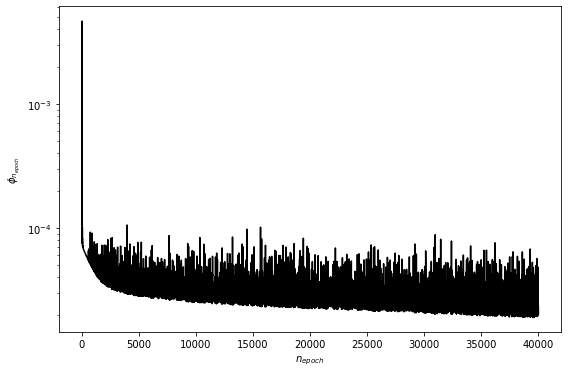

In [46]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(hist)), hist,'k-')
ax.set_xlabel('$n_{epoch}$')
ax.set_ylabel('$\\phi_{n_{epoch}}$');

## Resultados Vaso 1 

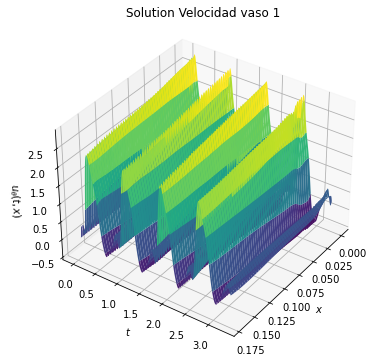

In [47]:
#vaso 1
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_1 = 0
xmax_1 = 0.1703


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 1000
T_a = L/U_a
xspace = np.linspace(xmin_1, xmax_1, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean1)*jac_x1, (tspace-Tmean1)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
upred = model_1(tf.cast(Xgrid,DTYPE))[:,1:2]

# Reshape upred
U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, U*U_a, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u_\\theta(t,x)$')
ax.set_title('Solution Velocidad vaso 1');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

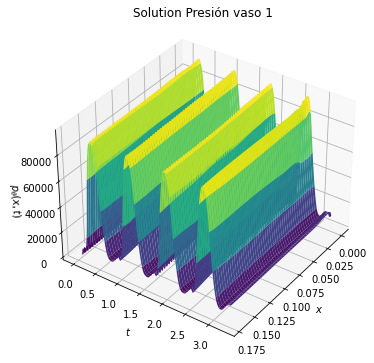

In [48]:
#vaso 1
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_1 = 0
xmax_1 = 0.1703


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 1000
T_a = L/U_a
xspace = np.linspace(xmin_1, xmax_1, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean1)*jac_x1, (tspace-Tmean1)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = model_1(tf.cast(Xgrid,DTYPE))[:,2:3]

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*p0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$p_\\theta(x,t)$')
ax.set_title('Solution Presión vaso 1');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

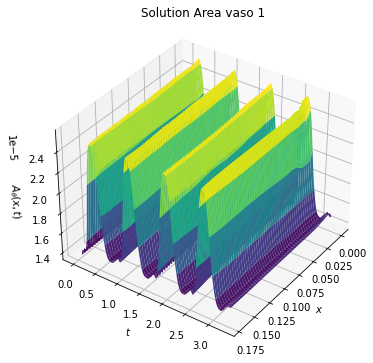

In [50]:
#vaso 1
from mpl_toolkits.mplot3d import Axes3D

#tmin = 0 
#tmax = 3.3
#xmin_1 = 0
#xmax_1 = 0.1703

tmin = 0 
tmax = 3.3
xmin_1 = 0
xmax_1 = 0.1703




###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 1000
T_a = L/U_a
xspace = np.linspace(xmin_1, xmax_1, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean1)*jac_x1, (tspace-Tmean1)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = tf.exp(model_1(tf.cast(Xgrid,DTYPE))[:,0:1])

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*A0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$A_\\theta(x,t)$')
ax.set_title('Solution Area vaso 1');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

## Resultados Vaso 2 

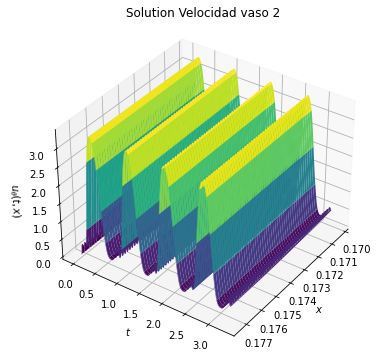

In [51]:
#vaso 2
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_2 = 0.1703
xmax_2 = 0.1773


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 600
T_a = L/U_a
xspace = np.linspace(xmin_2, xmax_2, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean2)*jac_x2, (tspace-Tmean2)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
upred = model_2(tf.cast(Xgrid,DTYPE))[:,1:2]

# Reshape upred
U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, U*U_a, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u_\\theta(t,x)$')
ax.set_title('Solution Velocidad vaso 2');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

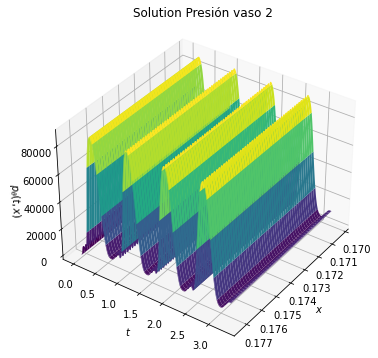

In [52]:
#vaso 2
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_2 = 0.1703
xmax_2 = 0.1773


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 600
T_a = L/U_a
xspace = np.linspace(xmin_2, xmax_2, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean2)*jac_x2, (tspace-Tmean2)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = model_2(tf.cast(Xgrid,DTYPE))[:,2:3]

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*p0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$p_\\theta(t,x)$')
ax.set_title('Solution Presión vaso 2');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

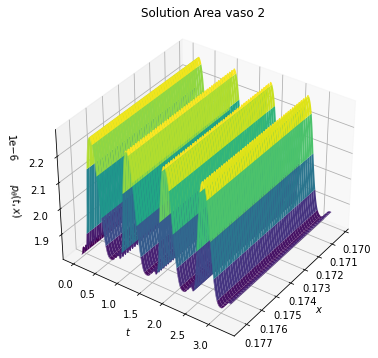

In [53]:
#vaso 2
from mpl_toolkits.mplot3d import Axes3D

#tmin = 0 
#tmax = 3.3
#xmin_2 = 0.1703
#xmax_2 = 0.1773


tmin = 0 
tmax = 3.3
xmin_2 = 0.1703
xmax_2 = 0.1773






###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 600
T_a = L/U_a
xspace = np.linspace(xmin_2, xmax_2, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean2)*jac_x2, (tspace-Tmean2)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = tf.exp(model_2(tf.cast(Xgrid,DTYPE))[:,0:1])

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*A0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$p_\\theta(t,x)$')
ax.set_title('Solution Area vaso 2');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

## Resultados Vaso 3

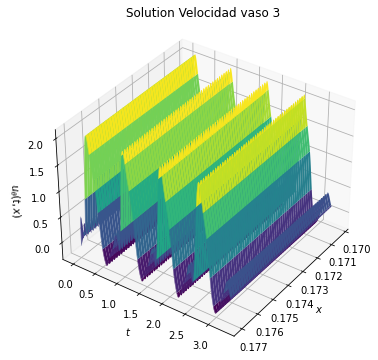

In [54]:
#vaso 3
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_3 = 0.1703
xmax_3 = 0.1770


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 600
T_a = L/U_a
xspace = np.linspace(xmin_3, xmax_3, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean3)*jac_x3, (tspace-Tmean3)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
upred = model_3(tf.cast(Xgrid,DTYPE))[:,1:2]

# Reshape upred
U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, U*U_a, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u_\\theta(t,x)$')
ax.set_title('Solution Velocidad vaso 3');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

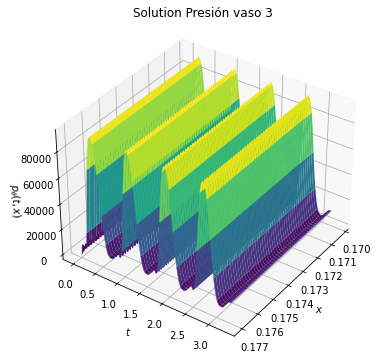

In [55]:
#vaso 3
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_3 = 0.1703
xmax_3 = 0.1770


###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 600
T_a = L/U_a
xspace = np.linspace(xmin_3, xmax_3, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean3)*jac_x3, (tspace-Tmean3)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = model_3(tf.cast(Xgrid,DTYPE))[:,2:3]

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*p0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$p_\\theta(t,x)$')
ax.set_title('Solution Presión vaso 3');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

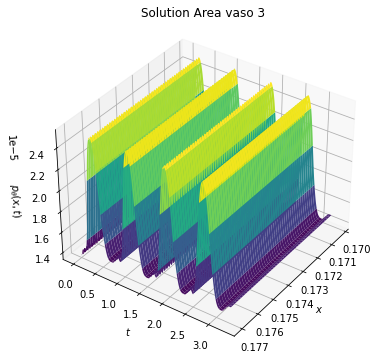

In [56]:
#vaso 3
from mpl_toolkits.mplot3d import Axes3D

tmin = 0 
tmax = 3.3
xmin_3 = 0.1703
xmax_3 = 0.1770





###
#X_r1_an = tf.concat([(X_r1_a[:, 0:1] - Xmean1)*jac_x1 , (X_r1_a[:,1:2] - Tmean1)*jac_t], axis = 1)
###


# Set up meshgrid
N = 1000
T_a = L/U_a
xspace = np.linspace(xmin_3, xmax_3, N + 1)
xspace = xspace*(1/L)
tspace = np.linspace(tmin, tmax, N + 1)
tspace = tspace*(1/T_a)
X, T = np.meshgrid(xspace, tspace)
X_an, T_an = np.meshgrid((xspace -  Xmean3)*jac_x1, (tspace-Tmean3)*jac_t)

Xgrid = np.vstack([X_an.flatten(),T_an.flatten()]).T


# Determine predictions of u(t, x)
pres_pred = tf.exp(model_3(tf.cast(Xgrid,DTYPE))[:,0:1])

# Reshape upred
P = pres_pred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X*L, T*T_a, P*A0, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$p_\\theta(x,t)$')
ax.set_title('Solution Area vaso 3');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

# Test de Kissas

## Vaso 1:

In [32]:
test_vessel_1 = np.load("test_1.npy", allow_pickle=True).item()

velocity_test_vessel1 = test_vessel_1["Velocity"][:,None]

presion_test_vessel1 = test_vessel_1["Pressure"][:,None]


In [33]:
#Gráfico 

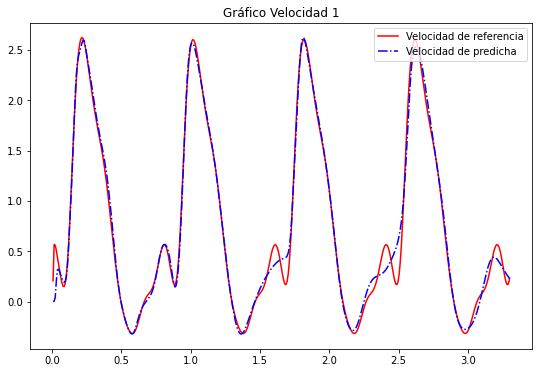

In [59]:
#Resultado método DG
u_mid_1 = velocity_test_vessel1

#Resultado NN
x_1_mid =tf.ones((N_u,1), dtype = DTYPE)*0.1
X_1_mid = tf.concat([x_1_mid, t_0], axis = 1) 
X_1_mid_a = tf.concat([x_1_mid/L, t_0/T_a], axis = 1) 
X_1_mid_an =  tf.concat([(X_1_mid_a[:, 0:1] - Xmean1)*jac_x1 , (X_1_mid_a[:,1:2] - Tmean1)*jac_t], axis = 1)
xx2, tt2 = X_1_mid_an[:, 0:1], X_1_mid_an[:,1:2]
test_1_vel = model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,1:2]




fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Velocidad 1')
ax.plot(t_0, u_mid_1, color = 'red', linestyle ='-', label = 'Velocidad de referencia')
ax.plot(t_0, test_1_vel*U_a, color = 'blue', linestyle ='-.', label = 'Velocidad de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 1 velocidad', bbox_inches = 'tight')




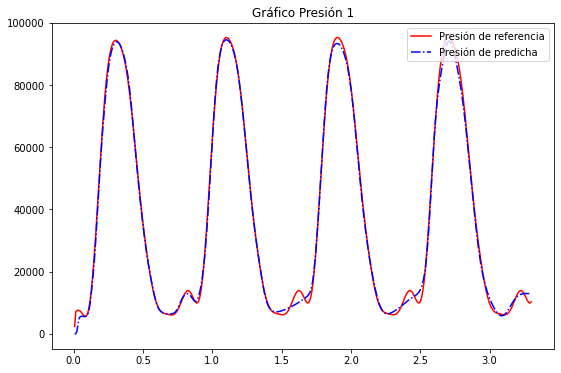

In [60]:
#Resultado método DG
p_mid_1 = presion_test_vessel1

#Resultado NN
x_1_mid =tf.ones((N_u,1), dtype = DTYPE)*0.1
X_1_mid = tf.concat([x_1_mid, t_0], axis = 1) 
X_1_mid_a = tf.concat([x_1_mid/L, t_0/T_a], axis = 1) 
X_1_mid_an =  tf.concat([(X_1_mid_a[:, 0:1] - Xmean1)*jac_x1 , (X_1_mid_a[:,1:2] - Tmean1)*jac_t], axis = 1)
xx2, tt2 = X_1_mid_an[:, 0:1], X_1_mid_an[:,1:2]
test_1_pres = model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,2:3]




fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Presión 1')
ax.plot(t_0, p_mid_1, color = 'red', linestyle ='-', label = 'Presión de referencia')
ax.plot(t_0, test_1_pres*p0, color = 'blue', linestyle ='-.', label = 'Presión de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 1 presión', bbox_inches = 'tight')

## Vaso 2:

In [36]:
test_vessel_2 = np.load("test_2.npy", allow_pickle=True).item()
velocity_test_vessel2 = test_vessel_2["Velocity"][:,None]
presion_test_vessel2 = test_vessel_2["Pressure"][:,None]

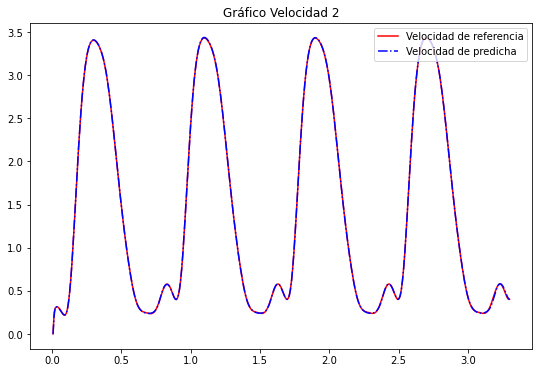

In [61]:
#Resultado método DG
u_mid_2 = velocity_test_vessel2

#Resultado NN
x_2_mid =tf.ones((N_u,1), dtype = DTYPE)*0.176
X_2_mid = tf.concat([x_2_mid, t_0], axis = 1) 
X_2_mid_a = tf.concat([x_2_mid/L, t_0/T_a], axis = 1) 
X_2_mid_an =  tf.concat([(X_2_mid_a[:, 0:1] - Xmean2)*jac_x2 , (X_2_mid_a[:,1:2] - Tmean2)*jac_t], axis = 1)
xx2, tt2 = X_2_mid_an[:, 0:1], X_2_mid_an[:,1:2]
test_2_vel = model_2(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,1:2]


fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Velocidad 2')
ax.plot(t_0, u_mid_2, color = 'red', linestyle ='-', label = 'Velocidad de referencia')
ax.plot(t_0, test_2_vel*U_a, color = 'blue', linestyle ='-.', label = 'Velocidad de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 2 velocidad', bbox_inches = 'tight')





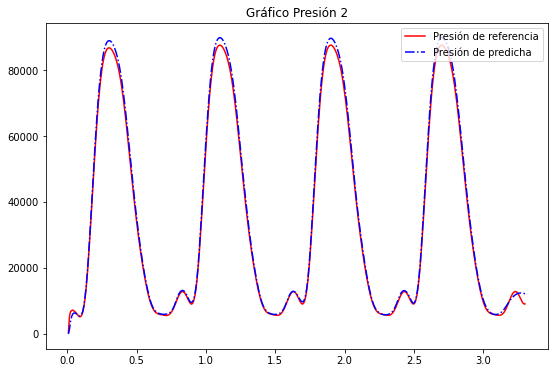

In [62]:
#Resultado método DG
p_mid_2 = presion_test_vessel2

#Resultado NN
x_2_mid =tf.ones((N_u,1), dtype = DTYPE)*0.176
X_2_mid = tf.concat([x_2_mid, t_0], axis = 1) 
X_2_mid_a = tf.concat([x_2_mid/L, t_0/T_a], axis = 1) 
X_2_mid_an =  tf.concat([(X_2_mid_a[:, 0:1] - Xmean2)*jac_x2 , (X_2_mid_a[:,1:2] - Tmean2)*jac_t], axis = 1)
xx2, tt2 = X_2_mid_an[:, 0:1], X_2_mid_an[:,1:2]
test_2_pres = model_2(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,2:3]




fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Presión 2')
ax.plot(t_0, p_mid_2, color = 'red', linestyle ='-', label = 'Presión de referencia')
ax.plot(t_0, test_2_pres*p0, color = 'blue', linestyle ='-.', label = 'Presión de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 2 presión.png', bbox_inches = 'tight')



## Vaso 3:

In [39]:
test_vessel_3 = np.load("test_3.npy", allow_pickle=True).item()
velocity_test_vessel3 = test_vessel_3["Velocity"][:,None]
presion_test_vessel3 = test_vessel_3["Pressure"][:,None]

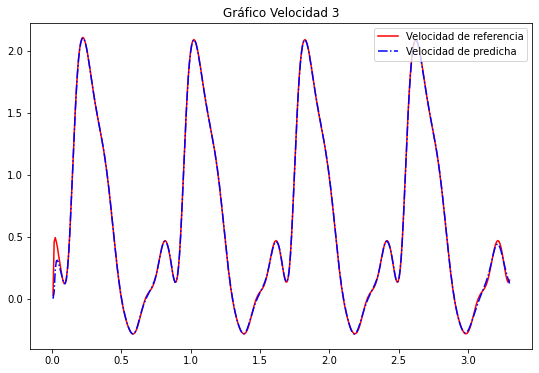

In [63]:
#Resultado método DG
u_mid_3 = velocity_test_vessel3

#Resultado NN
x_3_mid =tf.ones((N_u,1), dtype = DTYPE)*0.176
X_3_mid = tf.concat([x_3_mid, t_0], axis = 1) 
X_3_mid_a = tf.concat([x_3_mid/L, t_0/T_a], axis = 1) 
X_3_mid_an =  tf.concat([(X_3_mid_a[:, 0:1] - Xmean3)*jac_x3 , (X_3_mid_a[:,1:2] - Tmean2)*jac_t], axis = 1)
xx2, tt2 = X_3_mid_an[:, 0:1], X_3_mid_an[:,1:2]
test_3_vel = model_3(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,1:2]


fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Velocidad 3')
ax.plot(t_0, u_mid_3, color = 'red', linestyle ='-', label = 'Velocidad de referencia')
ax.plot(t_0, test_3_vel*U_a, color = 'blue', linestyle ='-.', label = 'Velocidad de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 3 velocidad', bbox_inches = 'tight')


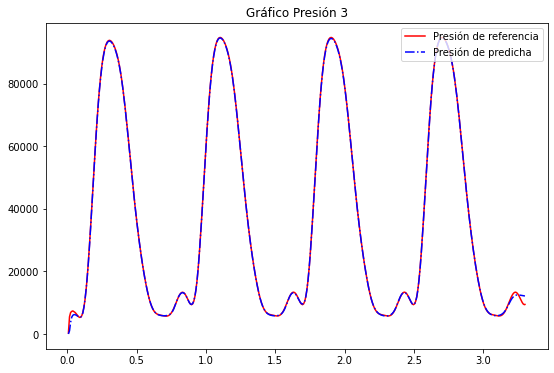

In [64]:
#Resultado método DG
p_mid_3 = presion_test_vessel3

#Resultado NN
x_3_mid =tf.ones((N_u,1), dtype = DTYPE)*0.176
X_3_mid = tf.concat([x_3_mid, t_0], axis = 1) 
X_3_mid_a = tf.concat([x_3_mid/L, t_0/T_a], axis = 1) 
X_3_mid_an =  tf.concat([(X_3_mid_a[:, 0:1] - Xmean3)*jac_x3 , (X_3_mid_a[:,1:2] - Tmean3)*jac_t], axis = 1)
xx2, tt2 = X_3_mid_an[:, 0:1], X_3_mid_an[:,1:2]
test_3_pres = model_3(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,2:3]




fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Presión 3')
ax.plot(t_0, p_mid_3, color = 'red', linestyle ='-', label = 'Presión de referencia')
ax.plot(t_0, test_3_pres*p0, color = 'blue', linestyle ='-.', label = 'Presión de predicha')
handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('grafico vaso 3 presión', bbox_inches = 'tight')



# Gráfico Conservación de Masa en la Bifurcación

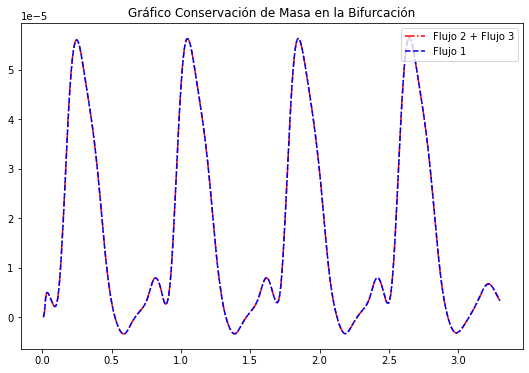

In [69]:
xx2, tt2 = X_r1bif_an[:, 0:1], X_r1bif_an[:,1:2]
test_1_area = tf.exp(model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,0:1])
test_1_vel = model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,1:2]

xx2_2, tt2_2 = X_r2bif_an[:, 0:1], X_r2bif_an[:,1:2]
test_2_area = tf.exp(model_2(tf.stack([xx2_2[:,0], tt2_2[:,0]], axis = 1))[:,0:1])
test_2_vel = model_2(tf.stack([xx2_2[:,0], tt2_2[:,0]], axis = 1))[:,1:2]

xx2_3, tt2_3 = X_r3bif_an[:, 0:1], X_r3bif_an[:,1:2]
test_3_area = tf.exp(model_3(tf.stack([xx2_3[:,0], tt2_3[:,0]], axis = 1))[:,0:1])
test_3_vel = model_3(tf.stack([xx2_3[:,0], tt2_3[:,0]], axis = 1))[:,1:2]


fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico Conservación de Masa en la Bifurcación')
ax.plot(t_0,  test_2_vel*U_a*test_2_area*A0 + test_3_vel*U_a*test_3_area*A0, color = 'red', linestyle ='-.', label = 'Flujo 2 + Flujo 3')
handles, labels = ax.get_legend_handles_labels()
ax.plot(t_0, test_1_vel*U_a*test_1_area*A0, color = 'blue', linestyle ='--', label = 'Flujo 1')
#handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('Gráfico Conservación de Masa en la Bifurcación', bbox_inches = 'tight')

# Gráfico de Conservación de Momentum en la Bifurcación

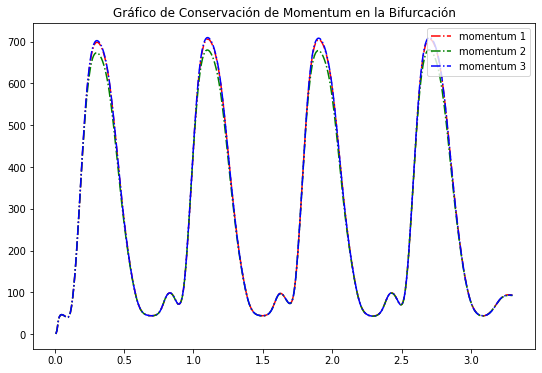

In [66]:
xx2, tt2 = X_r1bif_an[:, 0:1], X_r1bif_an[:,1:2]
test_1_area = tf.exp(model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,0:1])
test_1_vel = model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,1:2]
test_1_pres = model_1(tf.stack([xx2[:,0], tt2[:,0]], axis = 1))[:,2:3]

xx2_2, tt2_2 = X_r2bif_an[:, 0:1], X_r2bif_an[:,1:2]
test_2_area = tf.exp(model_2(tf.stack([xx2_2[:,0], tt2_2[:,0]], axis = 1))[:,0:1])
test_2_vel = model_2(tf.stack([xx2_2[:,0], tt2_2[:,0]], axis = 1))[:,1:2]
test_2_pres = model_2(tf.stack([xx2_2[:,0], tt2_2[:,0]], axis = 1))[:,2:3]

xx2_3, tt2_3 = X_r3bif_an[:, 0:1], X_r3bif_an[:,1:2]
test_3_area = tf.exp(model_3(tf.stack([xx2_3[:,0], tt2_3[:,0]], axis = 1))[:,0:1])
test_3_vel = model_3(tf.stack([xx2_3[:,0], tt2_3[:,0]], axis = 1))[:,1:2]
test_3_pres = model_3(tf.stack([xx2_3[:,0], tt2_3[:,0]], axis = 1))[:,2:3]

fig, ax = plt.subplots(figsize = (9,6))
plt.title('Gráfico de Conservación de Momentum en la Bifurcación')
ax.plot(t_0, test_1_pres*p0*0.00750062 + (1/2)*(test_1_vel*U_a)**2 , color = 'red', linestyle ='-.', label = 'momentum 1')
ax.plot(t_0, test_2_pres*p0*0.00750062 + (1/2)*(test_2_vel*U_a)**2  , color = 'green', linestyle ='-.', label = 'momentum 2')
handles, labels = ax.get_legend_handles_labels()
ax.plot(t_0, test_3_pres*p0*0.00750062 + (1/2)*(test_3_vel*U_a)**2, color = 'blue', linestyle ='-.', label = 'momentum 3')
#handles, labels = ax.get_legend_handles_labels()
ax. legend(loc = 'upper right', )
plt.show
plt.savefig('Gráfico de Conservación de Momentum en la Bifurcación', bbox_inches = 'tight')




In [71]:
model_1.save("red_vaso131Dic.h5")
model_2.save("red_vaso231Dic.h5")
model_3.save("red_vaso331Dic.h5")